In [17]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


calculating the distance matrix as input for the hierarchial clustering algorithm

In [18]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


**Complete Linkage Agglomeration**

In [19]:
from scipy.cluster.hierarchy import linkage
# it takes the condensed dist matrix (as returned by pdist) and not the squareform

In [20]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# we could have also used
# row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no of items in clust.'], index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Text(55.847222222222214, 0.5, 'Euclidean distance')

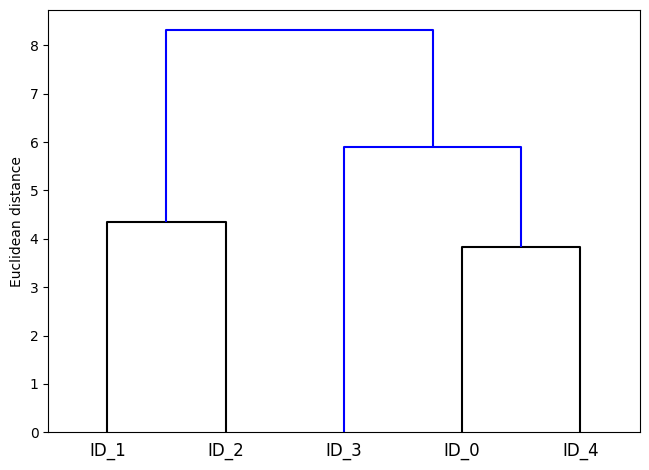

In [26]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, labels=labels)

import matplotlib.pyplot as plt
plt.tight_layout()
plt.ylabel('Euclidean distance')

attaching dendrograms to a heatmap

/tmp/ipykernel_154078/1123181248.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_154078/1123181248.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


[Text(0, -1.0, ''),
 Text(0, 0.0, 'ID_4'),
 Text(0, 1.0, 'ID_0'),
 Text(0, 2.0, 'ID_3'),
 Text(0, 3.0, 'ID_2'),
 Text(0, 4.0, 'ID_1'),
 Text(0, 5.0, '')]

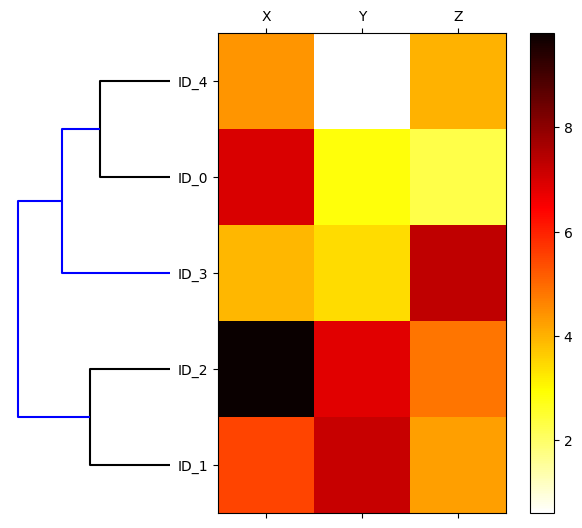

In [41]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# we reorder the data in the original dataframe according to the clustering labels
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# construct the heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# featuring the dendrogram
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

Agglomerative clustering on scikit learn helps prune trees

In [42]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)

Cluster labels: [1 0 0 2 1]


In [43]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)

Cluster labels: [0 1 1 0 0]
